# Code Assignment Mod6L14 — Confusion Matrix & Metrics on Restaurant Inspections

**Format:** Instructor Guidance → Your Task → We Share (Reflection)

**Goal:** Using the same **classification workflow** and models as last time, build confusion matrices and calculate accuracy, precision, and recall of each model.  


## Instructor Guidance (Pseudocode + Docs)

Use this as a roadmap; students implement below.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- Logistic Regression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
- Confusion Matrix / Classification Report — scikit-learn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  
- `pandas.get_dummies` (one-hot) — https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### Guidance (same models as last challenge -- FEEL free to copy and paste the code that you need from the last code assignment)

1) **Load CSV** → preview shape & columns.  
2) **Define target (y)** as a **binary** label: e.g., `CRITICAL FLAG == "Critical"` → 1, else 0 *(positive class = “Critical”)*.  
3) **Pick features (X)**: start small (`SCORE`), then add categorical dummies (`BORO`, `CUISINE DESCRIPTION`), keep it simple.  
4) **Minimal prep**: coerce **only used columns** to numeric (for numeric features); `get_dummies` for categoricals (`drop_first=True`). Drop NA rows on used cols.  
5) **Train–test split (80/20)** with fixed `random_state`.  
6) **Fit the same model** as last time (e.g., `LogisticRegression`), predict on **test**.  
7) **Evaluate**: confusion matrix, **accuracy**, **precision**, **recall**, **F1** (classification_report).  
8) **Repeat for 2 more models** (A (baseline)/B (single term)/C (more than one term)) on the **same split**; compare metrics.  
9) **Decide** which model is better for the business goal based on **precision vs recall** trade-offs.  


## Your Task

Work in pairs. Comment your choices briefly. Keep code simple and readable.

> **Reminder (last challenge model):** You trained **LogisticRegression**, on three models you will use those same 3 models!


### 1) Read the Restaurant Inspection CSV & Preview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### 2) Define the Binary Target (y)

We’ll predict whether an inspection had a **Critical violation**.

- Target rule: `CRITICAL FLAG == "Critical"` → **1**, else **0**.
- Positive class = **1 (Critical)** — keep this in mind for **precision/recall** meaning.


In [2]:
# Load dataset
df = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Lab/DA2025_Lectures/Mod6/data/restaurant_inspection_cleaned.csv')
display(df.head())
display(df.info())
display(df.describe())

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,INSPECTION_TYPE,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,NTA,Location
0,50141498,DMM BAKERY,Brooklyn,6802,BAY PARKWAY,11204.0,7183314372,Chinese,2025-06-16,No violations were recorded at the time of thi...,...,Cycle Inspection / Initial Inspection,40.612100,-73.983252,311.0,47.0,25800.0,3135132.0,3.055800e+09,BK28,POINT (-73.983252132334 40.612100428335)
1,50115119,JANNAT ADEN RESTAURANT,Bronx,2620,AVENUE Z,NaN,7185004894,Middle Eastern,2025-07-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
2,50121689,BELLA ITALY PIZZA,Bronx,1941,SOUTHERN BOULEVARD,10460.0,7183789577,Pizza,2025-06-09,No violations were recorded at the time of thi...,...,Administrative Miscellaneous / Initial Inspection,40.842262,-73.885759,206.0,15.0,36502.0,2010160.0,2.029600e+09,BX17,POINT (-73.885758684936 40.842261957703)
3,50142981,PIZZA PLUS,Manhattan,2253,3 AVENUE,10035.0,2122892400,Pizza,2025-06-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.802072,-73.936988,111.0,8.0,19400.0,1054626.0,1.017870e+09,MN34,POINT (-73.936988471232 40.802071782442)
4,50139126,WONDER,Brooklyn,310,SCHERMERHORN STREET,11217.0,9142614549,Fusion,2025-06-07,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.687480,-73.982245,302.0,33.0,4100.0,3000556.0,3.001728e+09,BK38,POINT (-73.982245142975 40.687480172953)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41100 entries, 0 to 41099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  41100 non-null  int64  
 1   DBA                    41100 non-null  object 
 2   BORO                   41100 non-null  object 
 3   BUILDING               40940 non-null  object 
 4   STREET                 41100 non-null  object 
 5   ZIPCODE                40597 non-null  float64
 6   PHONE                  41100 non-null  object 
 7   CUISINE_DESCRIPTION    41100 non-null  object 
 8   INSPECTION_DATE        41100 non-null  object 
 9   ACTION                 41100 non-null  object 
 10  VIOLATION_CODE         40591 non-null  object 
 11  VIOLATION_DESCRIPTION  40591 non-null  object 
 12  CRITICAL_FLAG          41100 non-null  object 
 13  SCORE                  39329 non-null  float64
 14  GRADE                  22556 non-null  object 
 15  GR

None

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL
count,4.110000e+04,40597.000000,39329.000000,40993.000000,40993.000000,40423.000000,40423.000000,40423.000000,4.021300e+04,4.088100e+04
mean,4.845420e+07,10714.489741,29.159196,40.274106,-73.112144,256.961631,20.356530,30462.868194,2.606248e+06,2.494582e+09
std,3.473063e+06,595.241082,21.543035,4.281550,7.772006,130.928956,15.484138,31846.096493,1.362256e+06,1.346751e+09
min,4.035602e+07,10001.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,5.003592e+07,10023.000000,13.000000,40.688945,-73.988314,106.000000,4.000000,8100.000000,1.049916e+06,1.010710e+09
50%,5.010674e+07,11101.000000,25.000000,40.737404,-73.954362,302.000000,20.000000,17200.000000,3.028676e+06,3.008560e+09
75%,5.014162e+07,11233.000000,39.000000,40.760766,-73.889191,402.000000,34.000000,44100.000000,4.017574e+06,4.006920e+09
max,5.017819e+07,11694.000000,203.000000,40.912822,0.000000,503.000000,51.000000,161700.000000,5.799501e+06,5.270001e+09


In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'])
df = df[(df['INSPECTION_DATE'] >= '2025-06-01') & (df['INSPECTION_DATE'] <= '2025-11-04')]

In [4]:
# Coerce fare, tip, distance to numeric safely
num_cols = ['GRADE', 'SCORE']
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols)

In [5]:
df['SCORE'].info()

<class 'pandas.core.series.Series'>
Index: 22554 entries, 0 to 41099
Series name: SCORE
Non-Null Count  Dtype  
--------------  -----  
22554 non-null  float64
dtypes: float64(1)
memory usage: 352.4 KB


In [6]:
df['is_A'] = (df['GRADE'] == 'A').astype(int)
df['is_A'].value_counts()

is_A
1    11905
0    10649
Name: count, dtype: int64

In [7]:
df['CritiCal_num'] = (df['CRITICAL_FLAG'] == 'Critical').astype(int)
df['CritiCal_num'].value_counts()

CritiCal_num
1    11679
0    10875
Name: count, dtype: int64

### 3) Create Three Models (you can copy and paste the same modeling code from last code assignment here it is okay if your models have different features as long as you have 3 models)

- **Model A (minimal numeric):** `SCORE` only (lower is better in NYC scoring).  
- **Model B (add location):** `SCORE` + one-hot `BORO`.  
- **Model C (richer categories):** `SCORE` + one-hot `BORO` + top cuisines (one-hot of `CUISINE DESCRIPTION` limited to most frequent K).

> If any column is missing in your file, skip that spec or adjust accordingly.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Dummy Variables (Method: sklearn.OneHotEncoder)
# We fit the encoder on the 'BORO' column
ohe = OneHotEncoder(drop='first', sparse_output=False)
feature_array = ohe.fit_transform(df[['BORO']])
feature_labels = list(ohe.get_feature_names_out())
dummies_skl = pd.DataFrame(feature_array, columns=feature_labels)

In [9]:
dummies_skl.head()

,BORO_Brooklyn,BORO_Manhattan,BORO_Queens,BORO_Staten Island
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [10]:
# Concatenate back to the original dataframe
df = pd.concat([df.reset_index(drop=True), dummies_skl.reset_index(drop=True)], axis=1)
print("\n--- Data with sklearn.OneHotEncoder ---")
df.head()


--- Data with sklearn.OneHotEncoder ---


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,BIN,BBL,NTA,Location,is_A,CritiCal_num,BORO_Brooklyn,BORO_Manhattan,BORO_Queens,BORO_Staten Island
0,50141498,DMM BAKERY,Brooklyn,6802,BAY PARKWAY,11204.0,7183314372,Chinese,2025-06-16,No violations were recorded at the time of thi...,...,3135132.0,3.055800e+09,BK28,POINT (-73.983252132334 40.612100428335),1,0,1.0,0.0,0.0,0.0
1,50098804,GYRO EXPRESS,Brooklyn,3160,CONEY ISLAND AVENUE,11235.0,7187699228,Middle Eastern,2025-10-14,Violations were cited in the following area(s).,...,3245015.0,3.086780e+09,BK19,POINT (-73.959713615942 40.578835975614),0,0,1.0,0.0,0.0,0.0
2,50154039,AMAR BARI,Brooklyn,1075,LIBERTY AVENUE,11208.0,9172507577,Bangladeshi,2025-08-27,Violations were cited in the following area(s).,...,3093593.0,3.041710e+09,BK83,POINT (-73.869546373377 40.678346807646),0,0,1.0,0.0,0.0,0.0
3,50124438,TIPSY SHANGHAI,Manhattan,594,3 AVENUE,10016.0,2124666488,Chinese,2025-06-27,Establishment re-opened by DOHMH.,...,1019147.0,1.008940e+09,MN20,POINT (-73.975981402783 40.748698335692),0,0,0.0,1.0,0.0,0.0
4,41395494,CITI FIELD SUITE KITCHEN,Queens,000,126TH ST & ROOSEVELT AVENUE,NaN,7185958100,American,2025-09-13,Violations were cited in the following area(s).,...,NaN,4.000000e+00,NaN,NaN,1,0,0.0,0.0,1.0,0.0


### 4) Minimal Cleaning: Drop NAs in Used Columns

Do this **per model** so each spec uses its own “clean” subset (same **target** slice).


## This has been done above in step 2👆

### 5) Train–Test Split (same split for all models)

Use **the same random_state** so models A/B/C are comparable.


In [11]:
# Logistic Regression to predict critical Flag using SCORE
X_A = df['SCORE']
y_A = df['CritiCal_num']
X_A = sm.add_constant(X_A)  # adding a constant for intercept
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.3, stratify=y_A, random_state=42)

In [12]:
X_B = df[['SCORE',"BORO_Manhattan","BORO_Brooklyn","BORO_Queens","BORO_Staten Island"]]
y_B = df['CritiCal_num']
X_B = sm.add_constant(X_B)  # adding a constant for intercept
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.3, stratify=y_B, random_state=42)

- for the third model, let's create another one-hot encoder for `cuisine_description` limited to the top 4 most frequent cuisine


In [ ]:
df['CUISINE_DESCRIPTION'].value_counts().nlargest(4).index


Index(['American', 'Chinese', 'Coffee/Tea', 'Pizza'], dtype='object', name='CUISINE_DESCRIPTION')

In [17]:
top_freq_cuisines = df['CUISINE_DESCRIPTION'].value_counts().nlargest(4).index

- Next Step, let's replace all other categories with “Other”

In [18]:
df['CUISINE_DESCRIPTION_FILTERD'] = df['CUISINE_DESCRIPTION'].where(df['CUISINE_DESCRIPTION'].isin(top_freq_cuisines), 'Other')


In [19]:
df['CUISINE_DESCRIPTION_FILTERD'].value_counts()

CUISINE_DESCRIPTION_FILTERD
Other         13603
American       3590
Chinese        2328
Coffee/Tea     1794
Pizza          1239
Name: count, dtype: int64

- Now let's create the dummy variable

In [21]:
from sklearn.preprocessing import OneHotEncoder
# Dummy Variables (Method: sklearn.OneHotEncoder)
# We fit the encoder on the 'CUISINE_DESCRIPTION_FILTERD' column
ohe_c = OneHotEncoder(drop='first', sparse_output=False)
feature_array_c = ohe_c.fit_transform(df[['CUISINE_DESCRIPTION_FILTERD']])
feature_labels_c = list(ohe_c.get_feature_names_out())
dummies_skl_c = pd.DataFrame(feature_array_c, columns=feature_labels_c)

In [22]:
dummies_skl_c.head()

,CUISINE_DESCRIPTION_FILTERD_Chinese,CUISINE_DESCRIPTION_FILTERD_Coffee/Tea,CUISINE_DESCRIPTION_FILTERD_Other,CUISINE_DESCRIPTION_FILTERD_Pizza
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [23]:
# Concatenate back to the original dataframe
df = pd.concat([df.reset_index(drop=True), dummies_skl_c.reset_index(drop=True)], axis=1)
print("\n--- Data with sklearn.OneHotEncoder ---")
df.head()


--- Data with sklearn.OneHotEncoder ---


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,CritiCal_num,BORO_Brooklyn,BORO_Manhattan,BORO_Queens,BORO_Staten Island,CUISINE_DESCRIPTION_FILTERD,CUISINE_DESCRIPTION_FILTERD_Chinese,CUISINE_DESCRIPTION_FILTERD_Coffee/Tea,CUISINE_DESCRIPTION_FILTERD_Other,CUISINE_DESCRIPTION_FILTERD_Pizza
0,50141498,DMM BAKERY,Brooklyn,6802,BAY PARKWAY,11204.0,7183314372,Chinese,2025-06-16,No violations were recorded at the time of thi...,...,0,1.0,0.0,0.0,0.0,Chinese,1.0,0.0,0.0,0.0
1,50098804,GYRO EXPRESS,Brooklyn,3160,CONEY ISLAND AVENUE,11235.0,7187699228,Middle Eastern,2025-10-14,Violations were cited in the following area(s).,...,0,1.0,0.0,0.0,0.0,Other,0.0,0.0,1.0,0.0
2,50154039,AMAR BARI,Brooklyn,1075,LIBERTY AVENUE,11208.0,9172507577,Bangladeshi,2025-08-27,Violations were cited in the following area(s).,...,0,1.0,0.0,0.0,0.0,Other,0.0,0.0,1.0,0.0
3,50124438,TIPSY SHANGHAI,Manhattan,594,3 AVENUE,10016.0,2124666488,Chinese,2025-06-27,Establishment re-opened by DOHMH.,...,0,0.0,1.0,0.0,0.0,Chinese,1.0,0.0,0.0,0.0
4,41395494,CITI FIELD SUITE KITCHEN,Queens,000,126TH ST & ROOSEVELT AVENUE,NaN,7185958100,American,2025-09-13,Violations were cited in the following area(s).,...,0,0.0,0.0,1.0,0.0,American,0.0,0.0,0.0,0.0


- Train-Test/Split model for model C

In [24]:
X_C = df[['SCORE',"BORO_Manhattan","BORO_Brooklyn","BORO_Queens","BORO_Staten Island", 'CUISINE_DESCRIPTION_FILTERD_Chinese', 'CUISINE_DESCRIPTION_FILTERD_Coffee/Tea', 'CUISINE_DESCRIPTION_FILTERD_Other', 'CUISINE_DESCRIPTION_FILTERD_Pizza']]
y_C = df['CritiCal_num']
X_C = sm.add_constant(X_C)  # adding a constant for intercept
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, test_size=0.3, stratify=y_C, random_state=42)

### 6) Fit the Same Models on the Train sets (Logistic Regression), Get Predictions, Print Confusion Matrices & Metric Reports

> **This is new**:  Be sure to look up documentation on `confusion_matrix` and `classification_report`.  Get a matrix and metrics report (accuracy, precision, recall, f1) for each model.


In [25]:
model_A = LogisticRegression()
model_A.fit(X_train_A.values, y_train_A)
y_pred_A = model_A.predict(X_test_A)
accuracy_A = accuracy_score(y_test_A, (y_pred_A >= 0.5).astype(int))
print(f"Accuracy of Logistic Regression Model A (using SCORE only): {accuracy_A:.4f}")

model_B = LogisticRegression()
model_B.fit(X_train_B.values, y_train_B)
y_pred_B = model_B.predict(X_test_B)
accuracy_B = accuracy_score(y_test_B, (y_pred_B >= 0.5).astype(int))
print(f"Accuracy of Logistic Regression Model B (using SCORE and BORO): {accuracy_B:.4f}")

model_C = LogisticRegression()
model_C.fit(X_train_C.values, y_train_C)
y_pred_C = model_C.predict(X_test_C)
accuracy_C = accuracy_score(y_test_C, (y_pred_C >= 0.5).astype(int))
print(f"Accuracy of Logistic Regression Model C (using SCORE, BORO, and CUISINE_DESCRIPTION_FILTERD): {accuracy_C:.4f}")


Accuracy of Logistic Regression Model A (using SCORE only): 0.5873
Accuracy of Logistic Regression Model B (using SCORE and BORO): 0.5867
Accuracy of Logistic Regression Model C (using SCORE, BORO, and CUISINE_DESCRIPTION_FILTERD): 0.5865


/opt/miniconda3/envs/data-analysis-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/data-analysis-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/data-analysis-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Generate the confusion matrix
cm_A = confusion_matrix(y_test_A, y_pred_A)
cm_B = confusion_matrix(y_test_B, y_pred_B)
cm_C = confusion_matrix(y_test_C, y_pred_C)

print("\n--- Classification Report for Model A ---")
print(classification_report(y_test_A, (y_pred_A >= 0.5).astype(int)))
print("\n--- Classification Report for Model B ---")
print(classification_report(y_test_B, (y_pred_B >= 0.5).astype(int)))
print("\n--- Classification Report for Model C ---")
print(classification_report(y_test_C, (y_pred_C >= 0.5).astype(int)))


--- Classification Report for Model A ---
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      3263
           1       0.62      0.53      0.57      3504

    accuracy                           0.59      6767
   macro avg       0.59      0.59      0.59      6767
weighted avg       0.59      0.59      0.59      6767


--- Classification Report for Model B ---
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      3263
           1       0.61      0.54      0.57      3504

    accuracy                           0.59      6767
   macro avg       0.59      0.59      0.59      6767
weighted avg       0.59      0.59      0.59      6767


--- Classification Report for Model C ---
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      3263
           1       0.62      0.53      0.57      3504

    accuracy                           0.59      6767

### 7) Visualize One Confusion Matrix 

Be able to interpret this Matrix 


--- Confusion Matrix for Model A ---


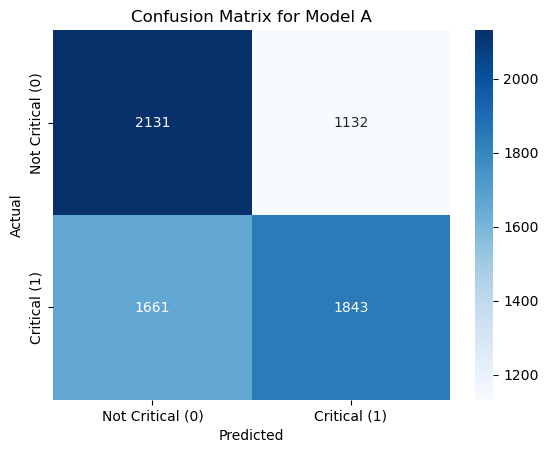


--- Confusion Matrix for Model B ---


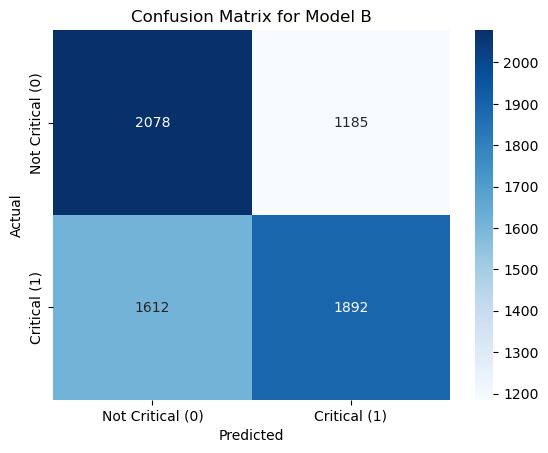


--- Confusion Matrix for Model C ---


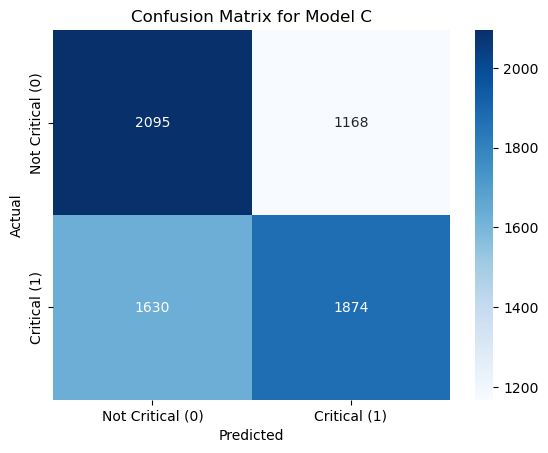

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Confusion Matrix for Model A ---")
sns.heatmap(cm_A, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Critical (0)', 'Critical (1)'],
            yticklabels=['Not Critical (0)', 'Critical (1)'])
plt.title('Confusion Matrix for Model A')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n--- Confusion Matrix for Model B ---")
sns.heatmap(cm_B, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Critical (0)', 'Critical (1)'],
            yticklabels=['Not Critical (0)', 'Critical (1)'])
plt.title('Confusion Matrix for Model B')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n--- Confusion Matrix for Model C ---")
sns.heatmap(cm_C, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Critical (0)', 'Critical (1)'],
            yticklabels=['Not Critical (0)', 'Critical (1)'])
plt.title('Confusion Matrix for Model C')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
df['CritiCal_num'].value_counts()

CritiCal_num
1    11679
0    10875
Name: count, dtype: int64

- Model B confusion matrix table shows me what my model got true or false when falging each restaurant. 
Out of 11679 restaurants on critical status the model only got 1612 right. This value shows that the model missing to flag many restaurant that is critical.

### 8) Decide Which Model Is “Better” — Explain Your Metric Choice

- If the **cost of missing a Critical** violation is high → prioritize **Recall** on the positive class.  
- If the **cost of wrongly flagging Critical** is high → prioritize **Precision** on the positive class.  
- If you want a balance → **F1**.

Write 3–5 sentences justifying your pick using the table above (Precision/Recall/F1).


- All three models have the same exact accuracy of about 59%, which is not bad. However, a high or moderate accuracy does not always mean that the model is performing well at detecting the desired outcome, because sometimes the model could miss the real outcome if the data is unbalanced. So instead of just relying on accuracy, we should also check the model’s performance on recall to make sure that every time the model flags a restaurant for a critical violation, we know how many of them we actually caught.

- In my opinion, Model B is better because it has the least amount of false negatives compared to Model A and Model C. The two other models have a recall of 65%, which is very high. That could mean our models missed a lot of restaurants that are supposed to be on a critical flag.


## We Share (Reflection)

1) **Chosen model (A/B/C)** and **why**, referencing **Precision/Recall/F1** for the **Critical (1)** class.  
- The 3 models have almost the same accuracy for flagging restaurants as critical or non-critical, but Model B performs better on recall (sensitivity), catching more restaurants in a critical status. I think this model is better because in reality we don’t want to miss any restaurants in critical situations, as it could result in other issues like getting people sick when going to those restaurants. So should prioritize recall in this case.
2) Your **confusion matrix** and a one-liner in plain English:  
   - “Out of all inspections we predicted **Critical**, **62%** were actually Critical (Precision).  
   - Of all actually **Critical** inspections, we caught **53%** (Recall).”  